##### 데싸노트의 실전에서 통하는 머신러닝 (골든레빗 MUST HAVE 시리즈)


- 와인 정보가 들어있는 데이터셋을 이용해 와인 등급을 예측합시다
- 3가지 목표값으로 이루어진 범주형 변수 : 다중분류 활용
- 알코올, 말산, 마그네슘, 색조 등을 독립변수로, 와인등급을 종속변수로 사용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

In [2]:
# Data Check

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

- 음.. 남들 다 178개있는데 중간중간 비어있는 녀석들이 보이네?
- 아 드디어 결측치라는 놈을 마주하게 되었습니다
- 일단 통계적 정보 마저 보고 판단합시다

In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


- count가 다른 게 몇 개 보이고
- 1. 근데 결측치를 일괄적으로 처리하기에는 변수들이 가진 데이터 값이 죄다 다르네
- 2. 아웃라이어 : 일부 변수에서 75%랑 MAX값이 튀는 경우가 있음 (이건 경우에 따라 모델링에 영향을 줄 수도 있다)

- 그런데 이렇게 제각각이면... head() 가지고는 힘든데

In [5]:
data['class'].unique() #목표 변수의 고유값 출력

array([0, 1, 2], dtype=int64)

In [6]:
data['class'].nunique() # 고유값 가짓수 출력

3

In [7]:
data['class'].value_counts() # 고유값에 해당하는 개수 출력

1    71
0    59
2    48
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

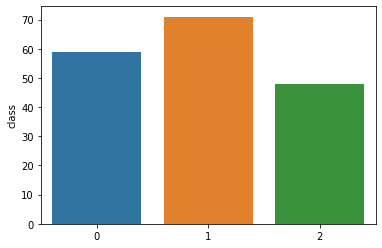

In [8]:
# 대충 그래프를 그려보면
sns.barplot(x = data['class'].value_counts().index, y=data['class'].value_counts())

<AxesSubplot:xlabel='class', ylabel='count'>

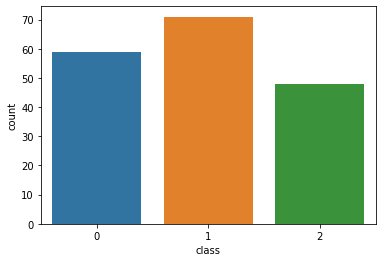

In [11]:
# 그런데 사실 저거보다 간단하게 그리는 방법이
sns.countplot(x = data['class'])

- 아무튼 결측치가 지금은 급합니다

In [12]:
data.isna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# 그런데 저렇게 확인하는 건 미친 짓이네
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [15]:
# sum이 아니라 mean으로도 볼 수는 있어요 (1.12%, 2.8% 정도 있다)
data.isna().mean()

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

- 결측치를 날릴 가장 확실한 방법 : dropna( )
- 근데 이 방법의 문제는 내가 원하지 않았던 것까지 날려버릴 우려가 있다는 점
- 나는 A 컬럼 결측치를 날려버리고 싶어서 dropna를 썼더니 B컬럼에도 결측치가 있어서 같이 날아가는 수가 있습니다

In [17]:
# 특정 컬럼을 날리고 싶다면 특정 컬럼을 지정하자
data.dropna(subset=['alcohol'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [18]:
# 알코올 컬럼 결측치는 다 날아가기는 했네?
data.dropna(subset=['alcohol']).isna().mean()

alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028409
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [19]:
# 두 번째 방법
# 나는 그 변수를 쓰지 않겠습니다

data.drop(['alcohol','nonflavanoid_phenols'], axis=1)

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


In [20]:
# 세 번째 방법
# 결측치를 적당한 값으로 채워넣읍시다

data.fillna(-99)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [21]:
# 평균값으로 채워주는 방법도 있고
data.fillna(data.mean())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### 여기서 문제
#### 결측치는 어떻게 처리하는 게 가장 바람직한가

- 극단적일 수도 있겠으나 대부분의 데이터가 결측치로 존재할 수도 있음
- 어느 비중일 때 어떻게 처리하는 것이 좋은가
- 통상 50% 이상일 때 drop()을 만지작 거리고, 70% ~ 80% 라면 적용해봄직 하다
- 근데 문제는 90% 이상 결측치가 존재해도 막상 그 변수가 데이터 분석에 있어서 가장 중요한 역할을 할 것 같다면...?
- (아오)

- 평균값으로 메꿔주는 건 아주 무난한 선택이고 더 복잡한 방법들 많겠지만
- 이 교재에서는 그냥 평균값이나 중위값(median)을 이용해 결측치를 채웁니다

In [22]:
# 평균도 제각각일 것 같으니 오늘은 중위값 갑니다
data.fillna(data.median(), inplace=True)

In [24]:
# 결측치 없어졌나 확인
data.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

### 스케일링
- 표준화 스케일링 : 평균을 0, 표준편차가 1이 되도록 데이터를 고르게 분포
- 로버스트 스케일링 : 데이터에 아웃라이어가 존재하고, 그 영향력을 유지하고 싶은 경우 사용
- 최소-최대 스케일링 : 데이터 분포 특성을 최대한 활용하고 싶을 때 사용
- 정규화 스케일링 : 행 기준의 스케일링이 필요할 때 쓰기는 하는데 실제로는 음............

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [26]:
# 표준화 스케일링

st_scaler = StandardScaler()
st_scaler.fit(data) # 학습

# transform()으로 학습한 정보 연산
st_scaled = st_scaler.transform(data)
st_scaled

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [27]:
# 이게 뭔가 싶다면
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [32]:
# 컬럼 어디갔어요 : 가져오면 되잖아
st_scaled = pd.DataFrame(st_scaled, columns=data.columns)
st_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [33]:
# 표준화 스케일링의 공식은
# 변수의 i 번째 값을 해당 변수의 평균으로 뺀 값을 해당 변수의 표준편차로 나눔 (Xi - mean(Xi) / sd(Xi))
# 다시 한 번 통계적 정보를 봐볼까요 반올림도 하고

round(st_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


In [34]:
# 로버스트 스케일링
# 로버스트의 특징은 사분위값을 이용해 계산된다는 점
# Xi - Q2(x) / Q3(x) - Q1(x)
# 분자는 변수의 i번째 값을 변수의 중위값으로 뺀 값
# 분모는 변수의 75% 지점 값을 25% 지점 값으로 뺀 값

rb_scaler = RobustScaler()

rb_scaled = rb_scaler.fit_transform(data) #fit과 transform을 한 번에 합니다
rb_scaled = pd.DataFrame(rb_scaled, columns=data.columns) # 데이터프레임으로 변형

# 이거도 마찬가지로 반올림하고 통계적 정보 확인
round(rb_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


In [35]:
# Min-Max 스케일링
# Xi - min(x) / min(x) - max(x)
# 분자는 변수의 i 번째 값을 최솟값으로 뺀 값
# 분모는 최댓값에서 최솟값을 뺀 값

mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)
mm_scaled = pd.DataFrame(mm_scaled, columns = data.columns)
round(mm_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 스케일링 방법은 알겠는데 뭘 쓰면 좋을까

- 아웃라이어 여부 판단후 아웃라이어를 살리겠다 vs 버리겠다
- 만약 아웃라이어 영향을 크게 받고 이걸 피하고 싶다면 로버스트 스케일링 활용 (로버스트는 아웃라이어 있어도 별 영향을 안 받으니까)
- 원래 데이터의 분포를 최대한 활용하고 싶다 : Min-Max Scaler
- 표준화 스케일링은 모든 데이터를 표준정규분포형태(종 모양)으로 바꾸려고 하기 때문에 데이터의 분포 특성을 없애는 수가 있음
- 그러니까 표준화 스케일링은 아웃라이어가 없고 데이터가 정규분포를 따르고 있다면 가장 무난하게 선택할 수 있음


### 머신러닝 스케일링 시 유의점
1. 종속변수 빼고 돌려요 (class를 예측할 건데 얘를 스케일링 하면 어떻게 하라고)
2. 스케일링 돌리기 전에 훈련셋, 테스트셋을 나눠야한다

In [37]:
# 훈련셋, 테스트셋 만듭시다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=100)

# 헷갈리면 이렇게 하고 X, y를 대신 넣읍시다
# X = data.drop('class', axis=1)
# y = data['class']

In [38]:
# 여기서는 데이터 특성이 유지되는 Min-Max로 갑니다

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train) # 학습

X_train_scaled = mm_scaler.transform(X_train) # 얘도 fit_transform으로 한번에 가도 됩니다
X_test_scaled = mm_scaler.transform(X_test)

In [40]:
# 이제야 kNN 모델이 나옴
from sklearn.neighbors import KNeighborsClassifier

# 모델 만들고 학습하고 예측하는 건 똑같습니다
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

# 예측값 볼까요
pred

c:\Users\luck1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2], dtype=int64)

In [41]:
# 얼마나 잘 예측했을까요
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8888888888888888

KNeightborsClassifier()

- n_neighbors = 5 : 예측에 참고할 이웃 수 (default = 5)
- weights = 'uniform' : 가중치 함수 (uniform의 경우 모든 포인트에 동일한 가중치 부여) // 'uniform', 'distance', 그 외 사용자 정의 함수
- metric = 'minkowski' : 거리 측정 기준 (세부 사양은 공식문서 참조 (https://scikit-learn.org))
- n_jobs = None : 실행할 병렬 작업 수

In [42]:
# 다시 가봅니다

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

c:\Users\luck1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9166666666666666

In [43]:
# 7로 했더니 정확도가 높아졌는데 한번 낮춰볼까

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

c:\Users\luck1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8888888888888888

In [53]:
# 5 이하에서 차이 그렇게 안 나는 거 같은데
# 반복문 돌려서 한 번 볼까
# 다시 가봅니다

scores = [] # 빈 리스트

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    scores.append(acc)

c:\Users\luck1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\luck1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

In [54]:
# 경고 나중에 없애는 걸 넣어야겠다
# 아무튼 예측률 확인해보면

scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

<AxesSubplot:>

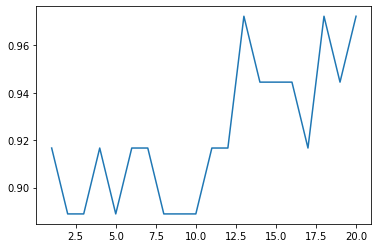

In [55]:
# 저걸 그래프로 그려보면
# 13 이후로 그렇게 드라마틱하지 않다는 걸 알 수 있음
sns.lineplot(x=range(1,21), y=scores)

In [56]:
# 우리는 13으로 결정하겠습니다

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

c:\Users\luck1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9722222222222222

### 추가로 생각해보기
- 타이타닉을 kNN 돌리면 어떨까